In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
act = pd.read_csv("interactions.csv")
rec = pd.read_csv("recipes.csv")

## EDA

**indexi ayarla**

In [ ]:
act.set_index("Unnamed: 0",inplace=True)
rec.set_index("Unnamed: 0",inplace=True)

### HEAD

In [ ]:
act.head()

,user_id,recipe_id,date,rating,review
Unnamed: 0,,,,,
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
20,202555,225241,2007-06-20,5,My husband has just found out that he had to c...
21,353579,225241,2007-08-14,5,"Very good, made with ingredients I usually hav..."


In [ ]:
rec.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
Unnamed: 0,,,,,,,,,,,,
23,deep fried dessert thingys,107699,20,158966,2005-01-05,"['30-minutes-or-less', 'time-to-make', 'course...","[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]",20,"['in a large bowl , mix flour , granulated sug...",my mother used to make this for us as a specia...,"['all-purpose flour', 'granulated sugar', 'bak...",13
24,easiest ever hollandaise sauce,49262,25,64428,2002-12-19,"['30-minutes-or-less', 'time-to-make', 'course...","[1290.4, 213.0, 4.0, 53.0, 22.0, 417.0, 1.0]",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5
42,i yam what i yam muffins,93958,45,133174,2004-06-22,"['60-minutes-or-less', 'time-to-make', 'course...","[171.8, 9.0, 28.0, 10.0, 8.0, 4.0, 8.0]",10,"['preheat oven to 375 degrees', 'spray muffin ...",these muffins may have slightly different ingr...,"['all-purpose flour', 'buckwheat flour', 'unsw...",18
43,immoral sandwich filling loose meat,58224,35,37183,2003-04-04,"['60-minutes-or-less', 'time-to-make', 'course...","[223.2, 22.0, 4.0, 7.0, 35.0, 30.0, 0.0]",6,"['brown the meat & drain fat', 'stir in sugar ...",just the thing for a day when you're wanton so...,"['ground beef', 'sugar', 'prepared yellow must...",8
51,killer lasagna,53402,90,60512,2003-02-04,"['weeknight', 'time-to-make', 'course', 'main-...","[370.5, 38.0, 21.0, 57.0, 53.0, 64.0, 3.0]",13,['brown the sausage and ground meat and drain ...,this was originally my mom's recipe and used t...,"['italian sausage', 'ground beef', 'garlic', '...",15


### shape

In [ ]:
rec.shape

(8404, 12)

In [ ]:
act.shape

(43569, 5)

### Tip bilgisi

In [ ]:
rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8404 entries, 23 to 99987
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            8404 non-null   object
 1   recipe_id       8404 non-null   int64 
 2   minutes         8404 non-null   int64 
 3   contributor_id  8404 non-null   int64 
 4   submitted       8404 non-null   object
 5   tags            8404 non-null   object
 6   nutrition       8404 non-null   object
 7   n_steps         8404 non-null   int64 
 8   steps           8404 non-null   object
 9   description     8173 non-null   object
 10  ingredients     8404 non-null   object
 11  n_ingredients   8404 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 853.5+ KB


In [ ]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43569 entries, 2 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    43569 non-null  int64 
 1   recipe_id  43569 non-null  int64 
 2   date       43569 non-null  object
 3   rating     43569 non-null  int64 
 4   review     43561 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.0+ MB


### describe

In [ ]:
rec.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe_id,8404.0,2.127010e+05,1.425356e+05,39.0,87284.75,192886.5,325880.50,5.372410e+05
minutes,8404.0,9.208984e+01,4.727200e+02,0.0,20.00,40.0,70.00,2.163000e+04
contributor_id,8404.0,5.010640e+06,9.434560e+07,27.0,53123.00,163986.0,378963.75,2.002234e+09
n_steps,8404.0,9.629938e+00,5.861639e+00,1.0,6.00,8.0,12.00,9.000000e+01
n_ingredients,8404.0,8.979058e+00,3.651815e+00,2.0,6.00,9.0,11.00,3.000000e+01


In [ ]:
act.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,43569.0,1.328011e+08,4.916116e+08,1533.0,130663.0,316717.0,758166.0,2.002371e+09
recipe_id,43569.0,1.492353e+05,1.304917e+05,39.0,43817.0,105773.0,222563.0,5.372410e+05
rating,43569.0,4.424591e+00,1.228081e+00,0.0,4.0,5.0,5.0,5.000000e+00


### merge

In [ ]:
df = pd.merge(act,rec,on="recipe_id")

## analiz

In [ ]:
df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
3,202555,225241,2007-06-20,5,My husband has just found out that he had to c...,chicken tamale pie for 2 ww core,45,67656,2007-04-29,"['60-minutes-or-less', 'time-to-make', 'course...","[248.0, 4.0, 28.0, 21.0, 44.0, 3.0, 11.0]",17,"['pre-heat oven to 350 degrees', 'prepare a no...",after wondering how recipe #224699 would work ...,"['cooking spray', 'onion', 'green peppers', 'g...",16
4,353579,225241,2007-08-14,5,"Very good, made with ingredients I usually hav...",chicken tamale pie for 2 ww core,45,67656,2007-04-29,"['60-minutes-or-less', 'time-to-make', 'course...","[248.0, 4.0, 28.0, 21.0, 44.0, 3.0, 11.0]",17,"['pre-heat oven to 350 degrees', 'prepare a no...",after wondering how recipe #224699 would work ...,"['cooking spray', 'onion', 'green peppers', 'g...",16


Text(0.5, 1.0, 'Rating dağılımı')

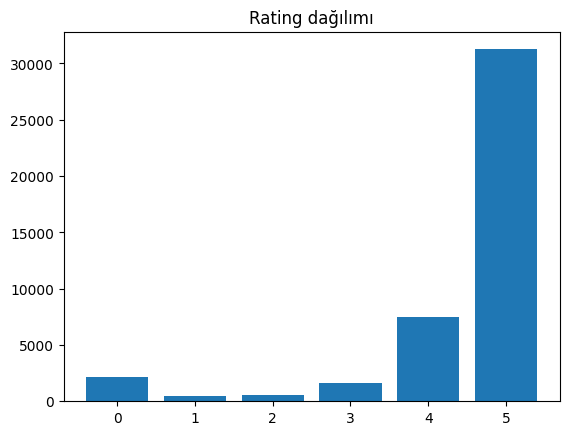

In [ ]:
plt.bar(act["rating"].value_counts().index, act["rating"].value_counts())
plt.title("Rating dağılımı")

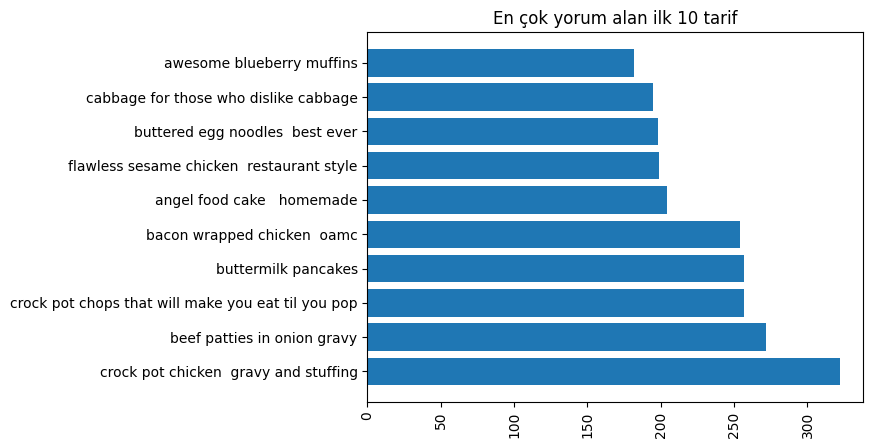

In [ ]:
plt.barh(df["name"].value_counts()[:10].index,df["name"].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.title("En çok yorum alan ilk 10 tarif")
plt.show()

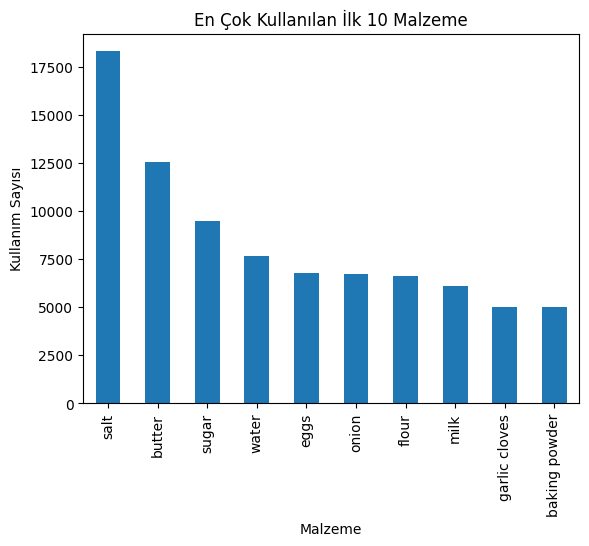

In [ ]:
# Malzemeleri içeren sütunu ayrıştır
ingredients_list = df['ingredients'].apply(eval).tolist()

# Tüm malzemeleri tek bir liste halinde birleştir
all_ingredients = [ingredient for sublist in ingredients_list for ingredient in sublist]

# Malzemelerin kullanım sayısını say
ingredient_counts = pd.Series(all_ingredients).value_counts().head(10)

# Bar grafiği çizimi
ingredient_counts.plot(kind='bar')
plt.title('En Çok Kullanılan İlk 10 Malzeme')
plt.xlabel('Malzeme')
plt.ylabel('Kullanım Sayısı')
plt.show()

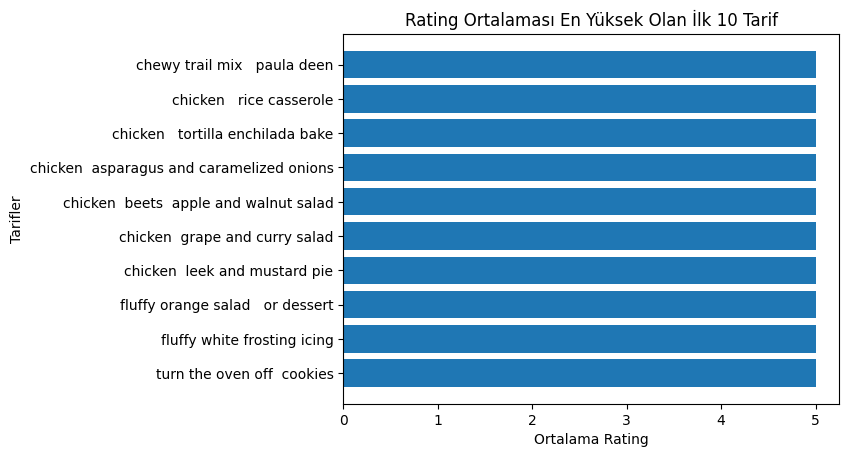

In [ ]:
# Rating ortalaması en yüksek olan ilk 10 ismi bulma
top_rated = df.groupby("name")["rating"].mean().sort_values(ascending=False).head(10)

# Sonucu DataFrame olarak düzenleme
top_rated_df = top_rated.reset_index()

# Yatay çubuk grafiği çizme
plt.barh(top_rated_df["name"], top_rated_df["rating"])

# Başlık ve düzenlemeler
plt.title("Rating Ortalaması En Yüksek Olan İlk 10 Tarif")
plt.xlabel("Ortalama Rating")
plt.ylabel("Tarifler")

# Grafiği gösterme
plt.show()

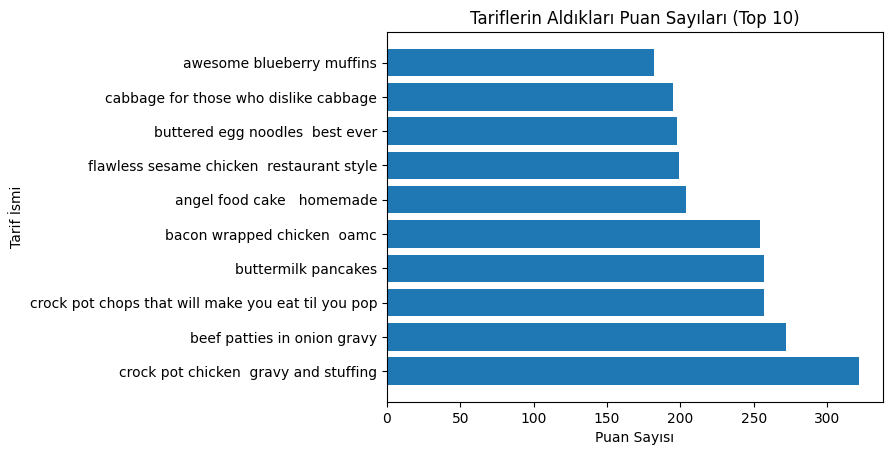

In [ ]:
# Her tarifin aldığı puan sayısını gruplayıp sayma
rating_counts = df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

# Yatay çubuk grafiği çizme
plt.barh(rating_counts.index, rating_counts.values)

# Başlık ve düzenlemeler
plt.title("Tariflerin Aldıkları Puan Sayıları (Top 10)")
plt.xlabel("Puan Sayısı")
plt.ylabel("Tarif İsmi")

# Grafiği gösterme
plt.show()


## RECOMMENDATION SYSTEMS

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
import string
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Interactions verisini yükleme
a = pd.read_csv("interactions.csv")
a.head(2)

# Recipes verisini yükleme
b = pd.read_csv("recipes.csv")
b.head(3)

,Unnamed: 0,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,23,deep fried dessert thingys,107699,20,158966,2005-01-05,"['30-minutes-or-less', 'time-to-make', 'course...","[1663.3, 221.0, 168.0, 66.0, 19.0, 158.0, 29.0]",20,"['in a large bowl , mix flour , granulated sug...",my mother used to make this for us as a specia...,"['all-purpose flour', 'granulated sugar', 'bak...",13
1,24,easiest ever hollandaise sauce,49262,25,64428,2002-12-19,"['30-minutes-or-less', 'time-to-make', 'course...","[1290.4, 213.0, 4.0, 53.0, 22.0, 417.0, 1.0]",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5
2,42,i yam what i yam muffins,93958,45,133174,2004-06-22,"['60-minutes-or-less', 'time-to-make', 'course...","[171.8, 9.0, 28.0, 10.0, 8.0, 4.0, 8.0]",10,"['preheat oven to 375 degrees', 'spray muffin ...",these muffins may have slightly different ingr...,"['all-purpose flour', 'buckwheat flour', 'unsw...",18


In [ ]:
# Veri şekillerini kontrol etme
a.shape , b.shape

((43569, 6), (8404, 13))

In [ ]:
# İki veri setini recipe_id üzerinden birleştirme
data = pd.merge(a,b, right_on='recipe_id',left_on='recipe_id')

In [ ]:
# Birleştirilen veri setinin şeklini kontrol etme
data.shape

(43569, 18)

In [ ]:
# Birleştirilen veriden bazı örnekler gösterme
data.head(2)

,Unnamed: 0_x,user_id,recipe_id,date,rating,review,Unnamed: 0_y,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,71599,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
1,3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,14906,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [ ]:
# Gereksiz sütunları düşürme
data.drop(["user_id","submitted","contributor_id","recipe_id"],axis=1,inplace=True)

In [ ]:
# Verinin özet istatistiklerini gösterme
data.describe()

,Unnamed: 0_x,rating,Unnamed: 0_y,minutes,n_steps,n_ingredients
count,43569.000000,43569.000000,43569.000000,43569.000000,43569.000000,43569.000000
mean,50068.630288,4.424591,49053.417751,105.006909,9.307650,8.815052
std,28993.421549,1.228081,28444.677110,524.665864,5.227101,3.545180
min,2.000000,0.000000,23.000000,0.000000,1.000000,2.000000
25%,24842.000000,4.000000,22874.000000,20.000000,6.000000,6.000000
50%,50174.000000,5.000000,49712.000000,40.000000,8.000000,8.000000
75%,75670.000000,5.000000,72581.000000,70.000000,12.000000,11.000000
max,99999.000000,5.000000,99987.000000,21630.000000,90.000000,30.000000


### Minutes & n_steps have outliers

In [ ]:
# 'nutrition' sütununu ayırma ve gerekli temizlemeleri yapma
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = data.nutrition.str.split(",",expand=True)
data['calories'] = data['calories'].apply(lambda x: x.replace("[" ,""))
data['carbohydrates'] = data['carbohydrates'].apply(lambda x: x.replace("]" ,""))
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

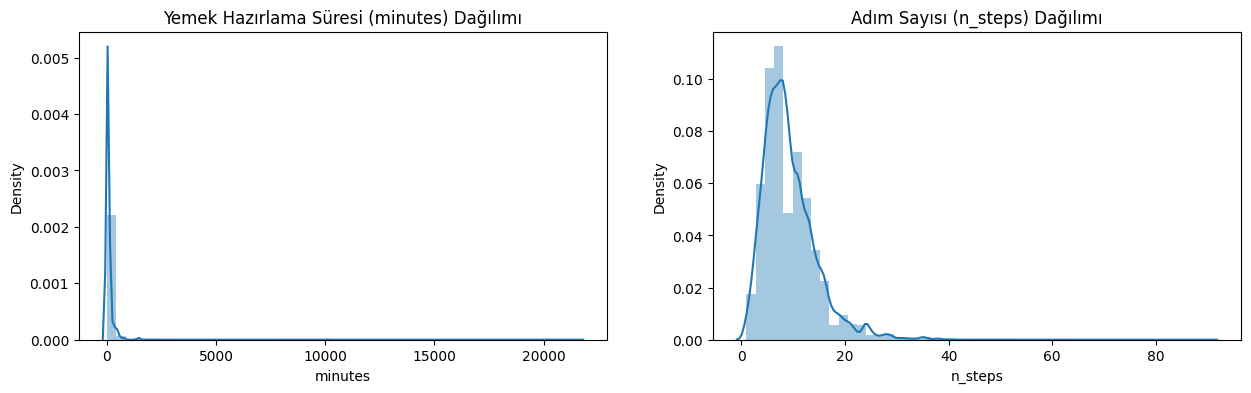

In [ ]:
# 'minutes' ve 'n_steps' değişkenlerinin dağılımlarını gösterme
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Grafik 1: minutes dağılımı
sns.distplot(data["minutes"], ax=ax[0])
ax[0].set_title("Yemek Hazırlama Süresi (minutes) Dağılımı")

# Grafik 2: n_steps dağılımı
sns.distplot(data["n_steps"], ax=ax[1])
ax[1].set_title("Adım Sayısı (n_steps) Dağılımı")

plt.show()

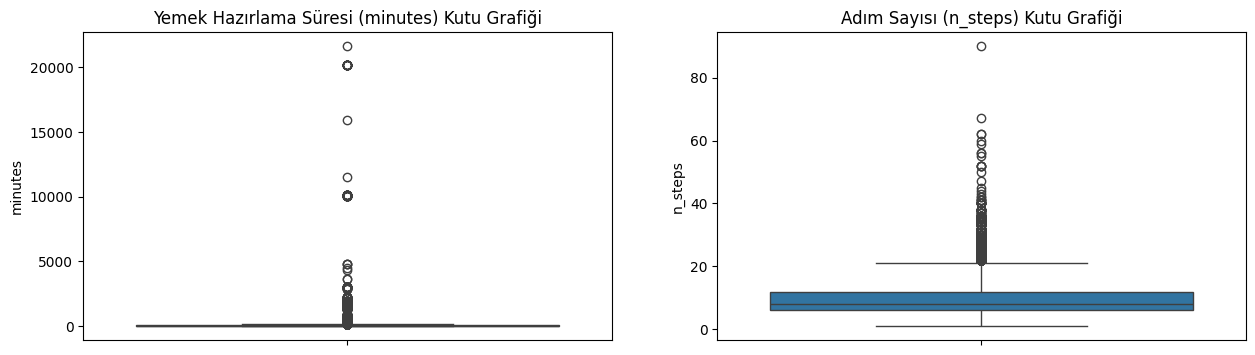

In [ ]:
# 'minutes' ve 'n_steps' değişkenlerinin kutu grafiğini çizme
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Grafik 1: minutes kutu grafiği
sns.boxplot(data=data["minutes"], ax=ax[0])
ax[0].set_title("Yemek Hazırlama Süresi (minutes) Kutu Grafiği")

# Grafik 2: n_steps kutu grafiği
sns.boxplot(data=data["n_steps"], ax=ax[1])
ax[1].set_title("Adım Sayısı (n_steps) Kutu Grafiği")

plt.show()

In [ ]:
# 'minutes' değişkeni için çeyrek değerleri ve IQR hesaplama
q1 = np.percentile(data["minutes"], 25)
q3 = np.percentile(data["minutes"], 75)
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR

# 'minutes' değişkeninde uç değerleri düşürme
data = data[(data["minutes"] < upper) & (data["minutes"] > lower)]

# 'n_steps' değişkeni için çeyrek değerleri ve IQR hesaplama
q1 = np.percentile(data["n_steps"], 25)
q3 = np.percentile(data["n_steps"], 75)
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR

# 'n_steps' değişkeninde uç değerleri düşürme
data = data[(data["n_steps"] < upper) & (data["n_steps"] > lower)]

# Veriyi temizledikten sonra şekli kontrol etme
print(data.shape)

(36971, 21)


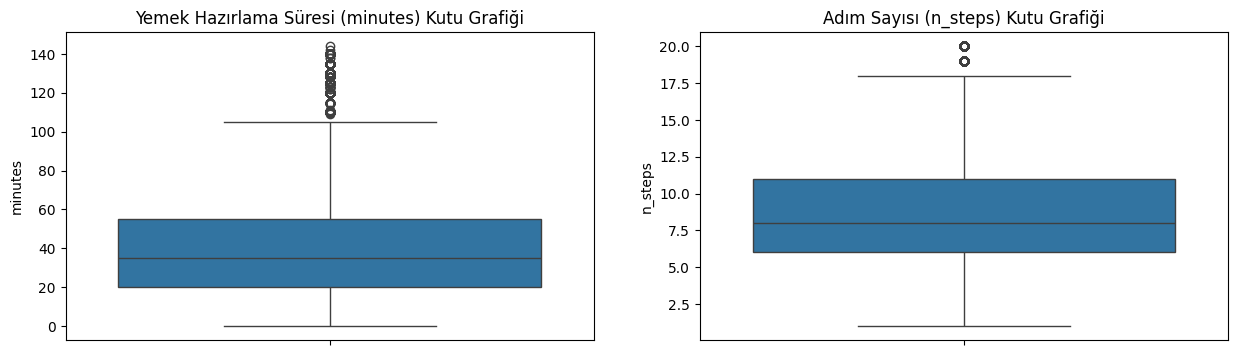

In [ ]:
# 'minutes' ve 'n_steps' değişkenlerinin kutu grafiğini çizme
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Grafik 1: minutes kutu grafiği
sns.boxplot(data=data["minutes"], ax=ax[0])
ax[0].set_title("Yemek Hazırlama Süresi (minutes) Kutu Grafiği")

# Grafik 2: n_steps kutu grafiği
sns.boxplot(data=data["n_steps"], ax=ax[1])
ax[1].set_title("Adım Sayısı (n_steps) Kutu Grafiği")

plt.show()

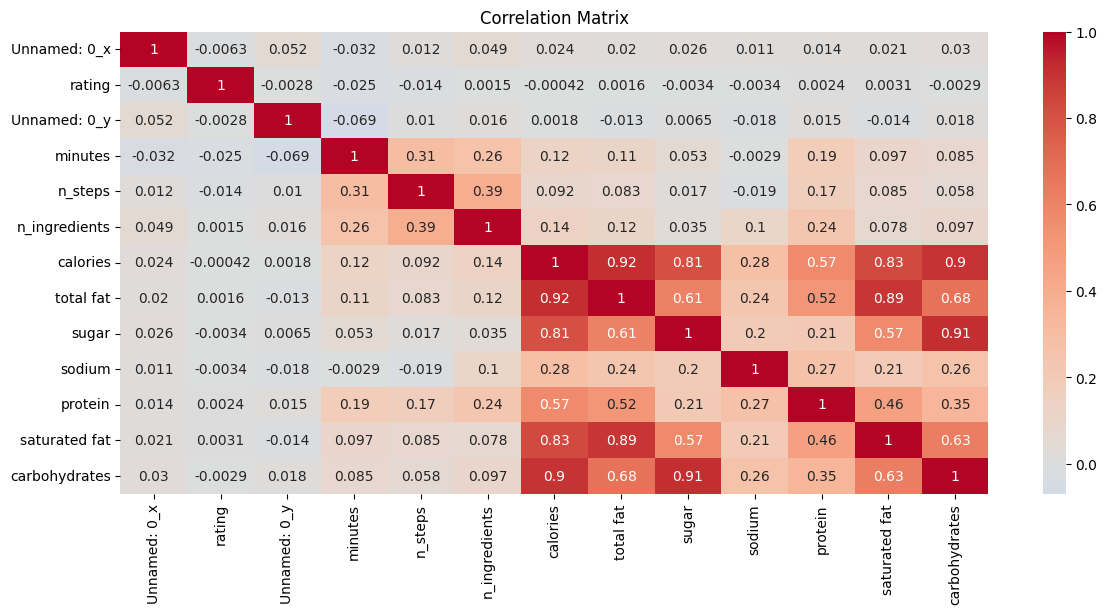

In [ ]:
# Yalnızca sayısal sütunları seçme
numeric_data = data.select_dtypes(include=[np.number])

# Korelasyon matrisini çizme
plt.figure(figsize=(14,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

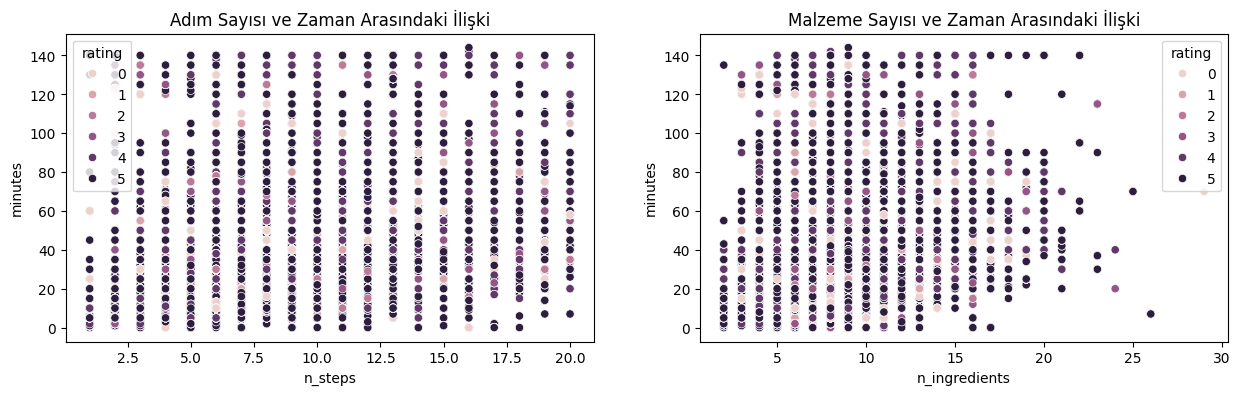

In [ ]:
# 'n_steps' ve 'minutes' ile 'rating' arasındaki ilişkiyi gösteren dağılım grafikleri
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Grafik 1: n_steps ve minutes
sns.scatterplot(data=data, x="n_steps", y="minutes", hue="rating", ax=ax[0])
ax[0].set_title("Adım Sayısı ve Zaman Arasındaki İlişki")

# Grafik 2: n_ingredients ve minutes
sns.scatterplot(data=data, x="n_ingredients", y="minutes", hue="rating", ax=ax[1])
ax[1].set_title("Malzeme Sayısı ve Zaman Arasındaki İlişki")

plt.show()

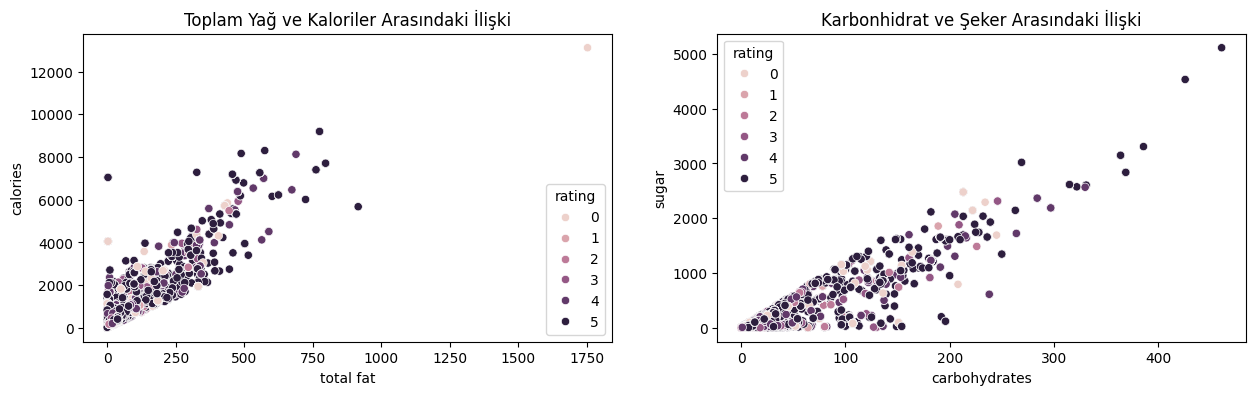

In [ ]:
# Besin ögeleri ile 'rating' arasındaki ilişkiyi gösteren dağılım grafikleri
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Grafik 1: total fat ve calories
sns.scatterplot(data=data, x="total fat", y="calories", hue="rating", ax=ax[0])
ax[0].set_title("Toplam Yağ ve Kaloriler Arasındaki İlişki")

# Grafik 2: carbohydrates ve sugar
sns.scatterplot(data=data, x="carbohydrates", y="sugar", hue="rating", ax=ax[1])
ax[1].set_title("Karbonhidrat ve Şeker Arasındaki İlişki")

plt.show()

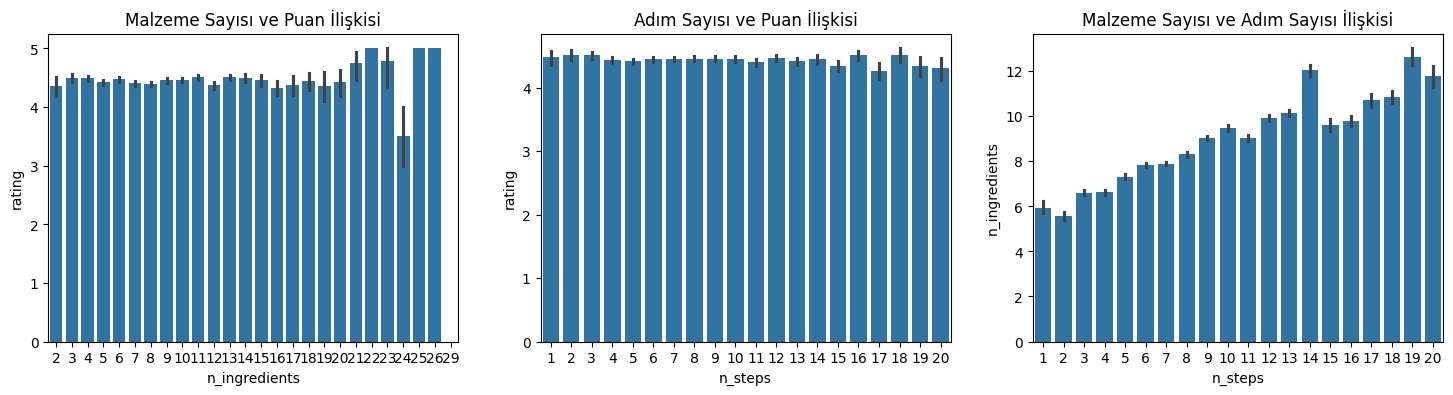

In [ ]:
# 'n_ingredients', 'n_steps' ve 'rating' arasındaki ilişkiyi gösteren çubuk grafikleri
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Grafik 1: n_ingredients ve rating
sns.barplot(data=data, y="rating", x="n_ingredients", ax=ax[0])
ax[0].set_title("Malzeme Sayısı ve Puan İlişkisi")

# Grafik 2: n_steps ve rating
sns.barplot(data=data, y="rating", x="n_steps", ax=ax[1])
ax[1].set_title("Adım Sayısı ve Puan İlişkisi")

# Grafik 3: n_ingredients ve n_steps
sns.barplot(data=data, y="n_ingredients", x="n_steps", ax=ax[2])
ax[2].set_title("Malzeme Sayısı ve Adım Sayısı İlişkisi")

plt.show()



1.   **tariflerde kullanılan malzeme sayısının tariflerin ortalama puanları üzerindeki etkisini gösterir. Daha fazla malzeme kullanıldığında tariflerin daha yüksek veya daha düşük puan alıp almadığını gözlemleyebilirsiniz.**
2.   **tariflerin hazırlanma adım sayısının (n_steps) tariflerin ortalama puanları üzerindeki etkisini gösterir. Daha fazla adım içeren tariflerin daha yüksek veya daha düşük puan alıp almadığını gözlemleyebilirsiniz.**
3. **tariflerdeki malzeme sayısı ile tariflerin hazırlanma adım sayısı arasındaki ilişkiyi gösterir. Daha fazla malzeme içeren tariflerin daha fazla adım içerip içermediğini gözlemleyebilirsiniz.**



In [ ]:
# Eksik değerleri kontrol etme ve düşürme
data.isnull().sum()
data.dropna(inplace=True)

In [ ]:
# Non-vegetarian kontrolü için et içeren malzemeler listesi
nonveg_ingred = ["egg","egg whites",]

In [ ]:
# Malzemeleri kontrol ederek non-vegetarian olup olmadığını belirleyen fonksiyon
def ingredient_check(data):
    veg = 0
    for a in literal_eval(data):
        if a in nonveg_ingred:
            veg = 1
        else:
            veg = 0
    return veg

In [ ]:
# 'non veg' sütununu ekleme
data["non veg"] = data["ingredients"].apply(ingredient_check)

In [ ]:
# Sütunları kontrol etme
data.columns

Index(['Unnamed: 0_x', 'date', 'rating', 'review', 'Unnamed: 0_y', 'name',
       'minutes', 'tags', 'nutrition', 'n_steps', 'steps', 'description',
       'ingredients', 'n_ingredients', 'calories', 'total fat', 'sugar',
       'sodium', 'protein', 'saturated fat', 'carbohydrates', 'non veg'],
      dtype='object')

In [ ]:
# Non-vegetarian değerlerini sayma
data["non veg"].value_counts()

non veg
0    35731
1      265
Name: count, dtype: int64

In [ ]:
# İlk satır örneğini gösterme
data.head(1)

,Unnamed: 0_x,date,rating,review,Unnamed: 0_y,name,minutes,tags,nutrition,n_steps,...,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,non veg
1,3,2010-02-27,5,I made the Mexican topping and took it to bunk...,14906,baked potato toppings,10,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,2786.2,342.0,134.0,290.0,161.0,301.0,42.0,0


In [ ]:
# İlgili sütunları seçme
rec = data[["rating","name","tags","description","ingredients",]]

In [ ]:
# Rating değerlerini gruplayarak toplama
rate = rec.groupby("name")["rating"].sum().reset_index()

In [ ]:
# Yinelenen değerleri kontrol etme ve düşürme
rec.duplicated().sum()
rec.drop_duplicates(inplace=True)

In [ ]:
# DataFrame indekslerini sıfırlama
rec.reset_index(drop=True,inplace=True)

In [ ]:
# İlk iki satır örneğini gösterme
rec.head(2)

,rating,name,tags,description,ingredients
0,5,baked potato toppings,"['15-minutes-or-less', 'time-to-make', 'course...",these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref..."
1,5,chicken tamale pie for 2 ww core,"['60-minutes-or-less', 'time-to-make', 'course...",after wondering how recipe #224699 would work ...,"['cooking spray', 'onion', 'green peppers', 'g..."


In [ ]:
# Veriyi listeye dönüştüren fonksiyon
def convert_to_list(data):
    a = data.replace("-","").replace("[","").replace("]","")
#     a = ''.join([i for i in a if not i.isdigit()])
    a = a.translate(str.maketrans('', '', string.punctuation))
    return a

In [ ]:
# 'tags', 'ingredients' ve 'description' sütunlarını temizleme
rec["tags"] = rec["tags"].apply(lambda x: convert_to_list(x))
rec["ingredients"] = rec["ingredients"].apply(lambda x: convert_to_list(x))
rec["description"] = rec["description"].apply(lambda x: convert_to_list(x))

**metinsel sütunları(tags, description ve ingredients) birleştirip tek bir sütun haline getirelim.**

In [ ]:
# 'tags', 'description' ve 'ingredients' sütunlarını birleştirerek 'rec' sütununu oluşturma
rec["rec"] = rec["tags"] + rec["description"] + rec["ingredients"]
rec = rec[~rec.duplicated("name")]
rec.reset_index(drop=True,inplace=True)

In [ ]:
# Temizlenmiş veriyi kaydetme
#rec.to_csv("food.csv")

**metinsel ifadeleri TF-IDF yöntemi ile vektöre dönüştürelim**

In [ ]:
# TF-IDF vektörleştirici oluşturma
cv = TfidfVectorizer()
rec_tfidf = cv.fit_transform(rec["rec"])
name_tfidf = cv.fit_transform(rec["name"])

# TF-IDF matrisleri arasındaki kosinüs benzerliğini hesaplama
rec_consin_sim = linear_kernel(rec_tfidf,rec_tfidf)
name_consin_sim = linear_kernel(name_tfidf,name_tfidf)

# İsimler için indeks serisi oluşturma
indices = pd.Series(rec.index,index=rec['name'])

**Sitedeki bir tarifin sayfasına girildiğinde yan tarafta 10 adet farklı tarif listelendiğini varsayalım. tavsiye sistemi; tarifin ismine veya tarif etiketleri, açıklamaları ve malzemelerine dayalı olarak benzer tarifleri önerir.**

In [ ]:
# Öneri fonksiyonu
def recommendation(data,sim):
    re_li = []
    df = pd.DataFrame([])
    ind = indices[data]
#     ind = rec[rec["name"]==data].index[0]
    sim_score = list(enumerate(sim[ind]))
    sim_score = sorted(sim_score,key=lambda x:x[1],reverse=True)
    sim_score = sim_score[0:10]
    rec_indices = [i[0] for i in sim_score]
    for i in rec_indices:
        re_li.append(rec.iloc[i]["name"])

    return re_li

**belirtilen tarif ismine (ilk tarifin ismine) dayalı olarak benzer tarifleri önerir.**

In [ ]:
# İsim bazlı öneri
recommendation(rec[:1]["name"][0],name_consin_sim)

['baked potato toppings',
 'baked potato soup',
 'baked potato casserole',
 'baked potato dip',
 'baked potato bites',
 '3 potato salad',
 'fancy baked potato soup',
 'baked potato  leek and cheese soup',
 'garlic potato',
 '5 ingredient baked potato skins']

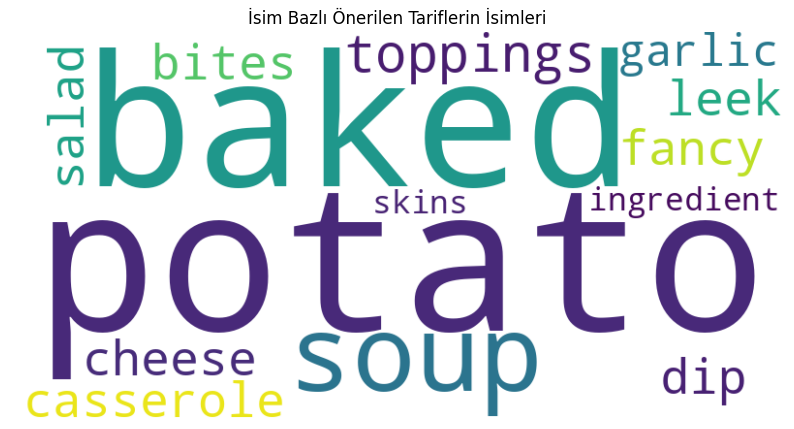

In [ ]:
# İsim bazlı öneri fonksiyonu çağrısı
name_based_recommendations = recommendation(rec[:1]["name"][0], name_consin_sim)

# Name sütununa göre kelime bulutu oluşturma
def visualize_names(similar_recipes):
    text = ' '.join(similar_recipes)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("İsim Bazlı Önerilen Tariflerin İsimleri")
    plt.show()

# İsim bazlı önerileri görselleştirme
visualize_names(name_based_recommendations)

**tarif etiketleri, açıklamaları ve malzemelerine dayalı olarak benzer tarifleri önerir.**

In [ ]:
# Etiketler, açıklama ve malzemeler bazında öneri
recommendation(rec[:1]["name"][0],rec_consin_sim)

['baked potato toppings',
 'dianne s broccoli',
 'creamy baked eggs for two',
 'blt casserole',
 'cheesy bacon hash browns',
 'easy salad',
 'grilled canadian bacon pizza',
 'bacon  tomato    cheese on toast',
 'awesome bacon tomato cheese spread',
 'almost like you re in heaven it  so good pizza quesadillas']

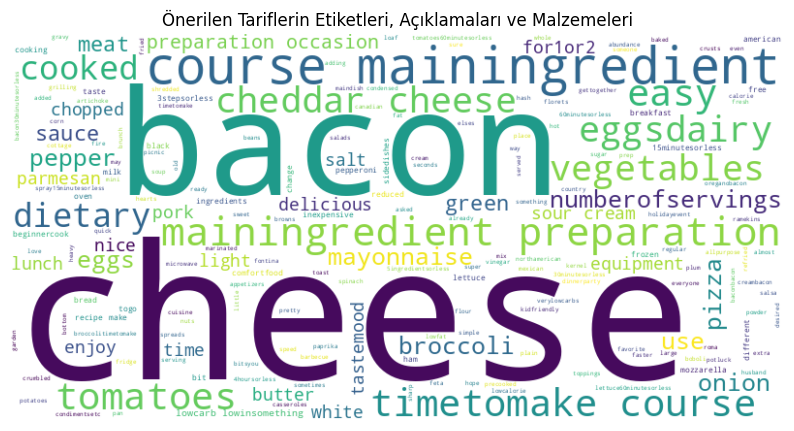

In [ ]:
# Öneri fonksiyonu çağrısı
similar_recipes = recommendation(rec[:1]["name"][0], rec_consin_sim)

# Önerilen tariflerin verilerini görselleştirme
def visualize_recommendations(similar_recipes, df):
    text = ''
    for recipe in similar_recipes:
        tags, description, ingredients = get_recipe_data(df, recipe)
        text += tags + ' ' + description + ' ' + ingredients

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Önerilen Tariflerin Etiketleri, Açıklamaları ve Malzemeleri")
    plt.show()

# Verileri görselleştirmek için get_recipe_data fonksiyonu
def get_recipe_data(df, recipe_name):
    recipe_data = df[df["name"] == recipe_name].iloc[0]
    tags = recipe_data["tags"]
    description = recipe_data["description"]
    ingredients = recipe_data["ingredients"]
    return tags, description, ingredients

# Görselleştirme
visualize_recommendations(similar_recipes, rec)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string